# Tasty Food Recommender

## Do stworzenia Tasty Food Recommendera (dalej TFR) użyliśmy następujących bibliotek

In [170]:
import pandas as pd # praca na bazie danych
import numpy as np # operacje matematyczne
import random as rn # funkcja sample do wybierania losowych rekordów z bazy
import matplotlib.pyplot as plt # wykresy
import seaborn as sns # wykresy
import time # obliczenie czasu wykonywania kodu

pd.set_option('display.max_rows', 10)

In [171]:
start_time = time.time()

## Przed rozpoczęciem działania algorytmu TFR tworzymy kopię bazy i usuwamy z niej niepotrzebne kolumny

In [172]:
recipesDatabase = pd.read_csv(r"dishes_with_mapped_tags.csv")
recipesDatabaseWithNames = recipesDatabase.drop(columns=['index', 'id_', 'slug', 'video_url', 'thumbnail_url', 'tags', 'cook_time', 'prep_time', 'total_time', 'ratings_negative', 'ratings_positive', 'score', 'protein', 'fat', 'calories', 'sugar', 'carbohydrates', 'fiber'])

### Oczyszczona baza prezentuje się następująco

In [173]:
recipesDatabaseWithNames.head()

,name,feature_page_shoppable_recipes_desserts,holiday_mothers_day,feature_page_tasty_s_5th_birthday_sweet,business_tags_best_of_tasty,equipment_chefs_knife,equipment_whisk,equipment_plastic_wrap,equipment_rolling_pin,equipment_cutting_board,...,feature_page_charcuterie_appetizers,feature_page_shoppable_recipes_holiday_appetizers,feature_page_uber_game_day_dips,feature_page_uber_game_day_sliders,feature_page_uber_game_day_appetizers,feature_page_charcuterie_recipes,feature_page_franks_dips,cuisine_lebanese,cuisine_south_african,cuisine_venezuelan
0,Homemade Cinnamon Rolls,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Whipped Coffee,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fluffy Pancakes,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,How to Make Cinnamon Rolls,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Healthy Banana Pancakes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
recipesDatabaseWithNames.describe()

,feature_page_shoppable_recipes_desserts,holiday_mothers_day,feature_page_tasty_s_5th_birthday_sweet,business_tags_best_of_tasty,equipment_chefs_knife,equipment_whisk,equipment_plastic_wrap,equipment_rolling_pin,equipment_cutting_board,equipment_dry_measuring_cups,...,feature_page_charcuterie_appetizers,feature_page_shoppable_recipes_holiday_appetizers,feature_page_uber_game_day_dips,feature_page_uber_game_day_sliders,feature_page_uber_game_day_appetizers,feature_page_charcuterie_recipes,feature_page_franks_dips,cuisine_lebanese,cuisine_south_african,cuisine_venezuelan
count,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,...,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000
mean,0.001345,0.004932,0.004707,0.002466,0.429724,0.197489,0.054472,0.053800,0.425913,0.479489,...,0.001793,0.000448,0.000448,0.000672,0.000672,0.000448,0.000224,0.000224,0.000224,0.000224
std,0.036654,0.070060,0.068457,0.049601,0.495092,0.398149,0.226972,0.225647,0.494536,0.499635,...,0.042314,0.021171,0.021171,0.025927,0.025927,0.021171,0.014972,0.014972,0.014972,0.014972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Następnie implementujemy klasę DataProcessing zawierającą metody:
### pickSample(x, quantity) - wybiera ze zbioru x losowe rekordy w liczbie quantity i zwraca dwa zbiory: sample oraz restOfDatabase, czyli próbkę i resztę zbioru x (bez próbki)
### dropColumns(x, threshold_percentage) - usuwa ze zbioru x kolumny zawierające procent jedynek większy niż zadane threshold_percentage, usuwa kolumny zawierające obiekty (tekst). Zwraca zbiór
### normalization(x) - normalizuje zbiór x normalizacją min-max

In [175]:
class DataProcessing:
    @staticmethod
    def pickSample(x, quantity):
        sample = x.sample(quantity)
        restOfDatabase = x.drop(sample.index)
        
        return sample, restOfDatabase
    
    @staticmethod
    def dropColumns(x, threshold_percentage):
        x = x.select_dtypes(exclude=["object"])
        count_ones = x.sum()
        percent_ones = count_ones / len(x)
        
        columns_to_drop = percent_ones[percent_ones > threshold_percentage].index
        x_dropped = x.drop(columns_to_drop, axis=1)

        return x_dropped
    
    @staticmethod
    def normalization(x):
        columnNames = x.columns.tolist()
  
        for column in columnNames:
            data = x.loc[:, column]
            maximum = max(data)
            minimum = min(data)
            for row in range(0, len(x), 1):
                xprim = (x.at[row, column] - minimum)/(maximum - minimum)
                x.at[row, column] = xprim

## Implementujemy również klasę SoftSet, zawierającą metody:
### meanVector(df) - tworzy wektor średni z wyborów użytkownika poprzez zsumowanie wszystkich elementów z kolumn i podzielenie ich przez długość tych kolumn
### addSumsColumn(restOfDatabase, chosenByUser) - tworzy kolumnę sum stworzonych poprzez mnożenie każdego elementu z kolumn restOfDatabase przez wektor meanVector
### pickRecommendations(restOfDatabase, chosenByUser, quantity) - zwraca pierwsze kilka rekordów (te z najwyższym wynikiem w kolumnie "sums") w liczbie quantity

In [176]:
class SoftSet:
    @staticmethod
    def meanVector(df):
        meanVector = []
        for column in df:
            columnValues = df[column].values
            meanVector.append(round(sum(columnValues)/len(columnValues), 2))
        return meanVector
    @staticmethod
    def addSumsColumn(restOfDatabase, chosenByUser):
        meanVector = SoftSet.meanVector(chosenByUser)
        sums = []
        for i in restOfDatabase.values:
            j = 0
            sum = 0
            for element in i:
                sum += element*meanVector[j]
                j += 1
            sums.append(sum)
        return sums
    @staticmethod
    def pickRecommendations(restOfDatabase, chosenByUser, quantity):
        restOfDatabase['sums'] = SoftSet.addSumsColumn(restOfDatabase, chosenByUser)
        restOfDatabase = restOfDatabase.sort_values(by="sums", ascending=False)
        
        return restOfDatabase.iloc[:, :-1].head(quantity)

## Ostatnią klasą jest ShowStatistics, która zawiera metody:
### reorderColumns(x) - przesuwa ostatnią kolumnę zbioru na początek
### calculateAccuracy(chosenByUser, recommendations) - oblicza dokładność między wektorem średnim z wyborów użytkownika i wektorem średnim z wyborów Recommendera
### showVectorPlot(chosenByUser, recommendations) - tworzy wykres pokazując graficznie wektory średnie wyborów użytkownika i Recommendera oraz różnicę między nimi

In [177]:
class ShowStatistics:
    @staticmethod
    def reorderColumns(x):
        cols = x.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        return x[cols]
    @staticmethod
    def calculateAccuracy(chosenByUser, recommendations):
        meanVector = SoftSet.meanVector(chosenByUser)
        recommendationsSetMeanVector = SoftSet.meanVector(recommendations)
        vector = np.abs(np.subtract(meanVector, recommendationsSetMeanVector))
        acc = sum(vector)/len(vector)
        acc = 1 - acc
        return acc
    @staticmethod
    def showVectorPlot(chosenByUser, recommendations):
        meanVector = SoftSet.meanVector(chosenByUser)
        recommendationsSetMeanVector = SoftSet.meanVector(recommendations)
        vector = np.abs(np.subtract(meanVector, recommendationsSetMeanVector))

        # Data for meanVector
        x = np.arange(0, len(meanVector))
        y_mean = np.array(meanVector)

        # Data for validatingSetMeanVector
        y_validating = np.array(recommendationsSetMeanVector)
        
        y_vector = np.array(vector)
        
        sns.reset_orig()

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.title("User choices vs TFR recommendations")
        plt.xlabel("Number of categories")
        plt.ylabel("Sums")
        plt.ylim(0, 1)
        plt.plot(x, y_mean, color="#ff7f0e", linestyle='dashed', label="User choices")
        plt.plot(x, y_validating, color="#2ca02c", linestyle='dashed', label="TFR recommendations")
        plt.plot(x, y_vector, color="#1f77b4", label="absolute")
        plt.legend()
        plt.show()

### Najpierw usuwamy kolumny zawierające dane w formacie tekstowym i te zawierające więcej niż 3% jedynek i wyświetlamy 5 pierwszych rekordów tego zbioru poniżej:

In [178]:
df = recipesDatabaseWithNames.copy()
df = DataProcessing.dropColumns(df, 0.03)
df.head()

,feature_page_shoppable_recipes_desserts,holiday_mothers_day,feature_page_tasty_s_5th_birthday_sweet,business_tags_best_of_tasty,meal_drinks,feature_page_tips_viral,equipment_fish_spatula,method_steam,cuisine_japanese,feature_page_tips_basics,...,feature_page_charcuterie_appetizers,feature_page_shoppable_recipes_holiday_appetizers,feature_page_uber_game_day_dips,feature_page_uber_game_day_sliders,feature_page_uber_game_day_appetizers,feature_page_charcuterie_recipes,feature_page_franks_dips,cuisine_lebanese,cuisine_south_african,cuisine_venezuelan
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Rozpoczyna się działanie algorytmu

### Dzielimy zbiór na dwa zbiory chosenByUser, restOfDatabase, przy czym pierwszy jest losową próbką 40 rekordów. Wyświetlamy tenże zbiór poniżej:

In [179]:
chosenByUser, restOfDatabase = DataProcessing.pickSample(df, 40)

In [180]:
chosenByUserWithNames = chosenByUser.copy()
chosenByUserWithNames['name'] = recipesDatabaseWithNames['name']
print("Recipes chosen by the user:")
ShowStatistics.reorderColumns(chosenByUserWithNames).head()

Recipes chosen by the user:


,name,feature_page_shoppable_recipes_desserts,holiday_mothers_day,feature_page_tasty_s_5th_birthday_sweet,business_tags_best_of_tasty,meal_drinks,feature_page_tips_viral,equipment_fish_spatula,method_steam,cuisine_japanese,...,feature_page_charcuterie_appetizers,feature_page_shoppable_recipes_holiday_appetizers,feature_page_uber_game_day_dips,feature_page_uber_game_day_sliders,feature_page_uber_game_day_appetizers,feature_page_charcuterie_recipes,feature_page_franks_dips,cuisine_lebanese,cuisine_south_african,cuisine_venezuelan
1830,Blue Corn Cornbread Muffins,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1088,Enchilada-inspired Stuffed Shells,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3272,King Cake,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2234,Cookies & Ice Cream Dome Cake,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3778,Cranberry Pecan Bars,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Wyszukujemy z reszty zbioru 40 rekordów, które będą naszymi rekomendacjami, wyświetlamy pierwsze 5 rekordów poniżej:

In [181]:
recommendations = SoftSet.pickRecommendations(restOfDatabase, chosenByUser, 40)

In [182]:
recommendationsWithNames = recommendations.copy()
recommendationsWithNames['name'] = recipesDatabaseWithNames['name']
print("Recipes chosen by the recommender:")
ShowStatistics.reorderColumns(recommendationsWithNames).head()

Recipes chosen by the recommender:


,name,feature_page_shoppable_recipes_desserts,holiday_mothers_day,feature_page_tasty_s_5th_birthday_sweet,business_tags_best_of_tasty,meal_drinks,feature_page_tips_viral,equipment_fish_spatula,method_steam,cuisine_japanese,...,feature_page_charcuterie_appetizers,feature_page_shoppable_recipes_holiday_appetizers,feature_page_uber_game_day_dips,feature_page_uber_game_day_sliders,feature_page_uber_game_day_appetizers,feature_page_charcuterie_recipes,feature_page_franks_dips,cuisine_lebanese,cuisine_south_african,cuisine_venezuelan
839,Salmon Meal Prep for Two,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4008,One-Pan Honey Garlic Salmon & Asparagus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
966,Cajun Blackened Salmon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
820,Crunchy Avocado Tuna Wraps,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
716,One-Pot Sausage And Peppers Pasta,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Na koniec obliczamy dokładność rekomendacji porównując średnie wektory ze zbiorów chosenByUser oraz recommendations:

In [183]:
acc = ShowStatistics.calculateAccuracy(chosenByUser, recommendations)
print("The accuracy is", round(acc*100, 2), "%")

The accuracy is 98.23 %


### Dodatkowo tworzymy jeszcze wykres ukazujący porównanie wyborów użytkownika z TFR:

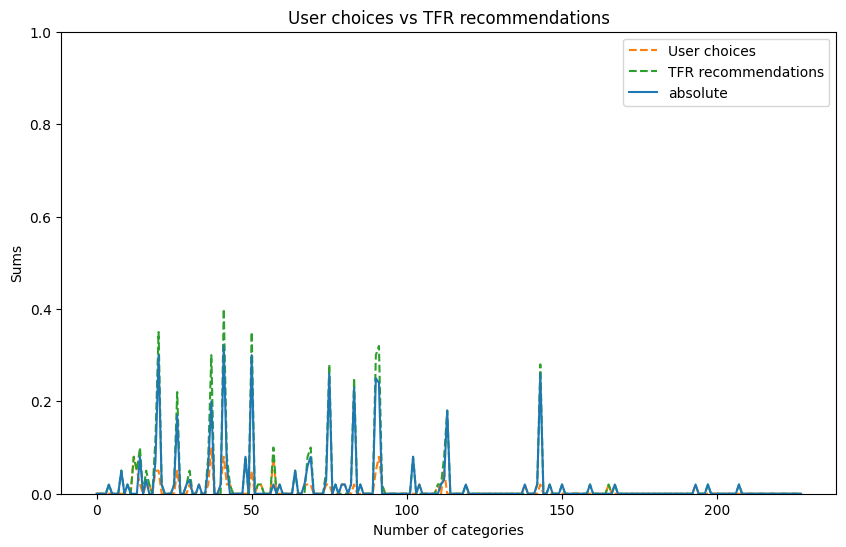

In [184]:
ShowStatistics.showVectorPlot(chosenByUser, recommendations)

### Czas wykonania kodu po całym jednym uruchomieniu to...

In [185]:
end_time = time.time()
elapsed_time = end_time - start_time
print("Code execution time: {:.2f} seconds".format(elapsed_time))

Code execution time: 1.37 seconds
